# 1. Pytorch加载数据

① Pytorch中加载数据需要Dataset、Dataloader。

 - Dataset提供一种方式去获取每个数据及其对应的label，告诉我们总共有多少个数据。
 - Dataloader为后面的网络提供不同的数据形式，它将一批一批数据进行一个打包。

# 2. 常用数据集两种形式

① 常用的第一种数据形式，文件夹的名称是它的label。

② 常用的第二种形式，lebel为文本格式，文本名称为图片名称，文本中的内容为对应的label。

In [1]:
from torch.utils.data import Dataset
help(Dataset)

Help on class Dataset in module torch.utils.data.dataset:

class Dataset(typing.Generic)
 |  An abstract class representing a :class:`Dataset`.
 |  
 |  All datasets that represent a map from keys to data samples should subclass
 |  it. All subclasses should overwrite :meth:`__getitem__`, supporting fetching a
 |  data sample for a given key. Subclasses could also optionally overwrite
 |  :meth:`__len__`, which is expected to return the size of the dataset by many
 |  :class:`~torch.utils.data.Sampler` implementations and the default options
 |  of :class:`~torch.utils.data.DataLoader`.
 |  
 |  .. note::
 |    :class:`~torch.utils.data.DataLoader` by default constructs a index
 |    sampler that yields integral indices.  To make it work with a map-style
 |    dataset with non-integral indices/keys, a custom sampler must be provided.
 |  
 |  Method resolution order:
 |      Dataset
 |      typing.Generic
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __add__(self, oth

# 3. 路径直接加载数据

In [2]:
from PIL import Image

img_path = "Data/hymenoptera_data/train/ants/0013035.jpg"        
img = Image.open(img_path)
img.show()


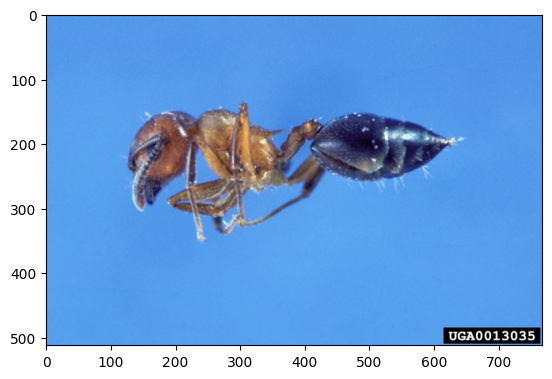

In [8]:
#  另外一种方法   查看图片   
%matplotlib inline
import matplotlib.pyplot as plt
from skimage import io

image = io.imread(img_path)
plt.imshow(image)


# 4. Dataset加载数据

In [10]:
from torch.utils.data import Dataset
from PIL import Image
import os

class MyData(Dataset):     
    def __init__(self,root_dir,label_dir):    # 该魔术方法当创建一个事例对象时，会自动调用该函数
        self.root_dir = root_dir # self.root_dir 相当于类中的全局变量
        self.label_dir = label_dir     
        self.path = os.path.join(self.root_dir,self.label_dir) # 字符串拼接，根据是Windows或Lixus系统情况进行拼接               
        self.img_path = os.listdir(self.path) # 获得路径下所有图片的地址
        
    def __getitem__(self,idx):
        img_name = self.img_path[idx]
        img_item_path = os.path.join(self.root_dir,self.label_dir,img_name)            
        img = Image.open(img_item_path)
        label = self.label_dir
        return img, label
    
    def __len__(self):
        return len(self.img_path)
    
root_dir = "Data/hymenoptera_data/train"
ants_label_dir = "ants"
bees_label_dir = "bees"
ants_dataset = MyData(root_dir, ants_label_dir)
bees_dataset = MyData(root_dir, bees_label_dir)


print(len(ants_dataset))
print(len(bees_dataset))


train_dataset = ants_dataset + bees_dataset # train_dataset 就是两个数据集的集合了     
print(len(train_dataset))

img,label = train_dataset[200]
print("label：",label)
# 或者 用这个 打开图片  img.show()
plt.imshow(img)



124
121
245
label： bees


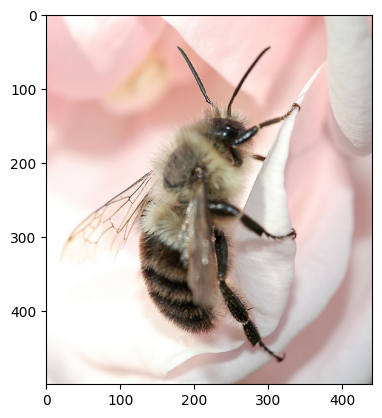

In [11]:
plt.imshow(img)